<a href="https://colab.research.google.com/github/Vidhuran-Rajendran/Face_Emotion_Recognition/blob/main/Live_class_Monitoring_System(Face_Emotion_Recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

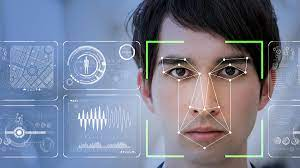

# **Project Title** 

 **Live Class Monitoring System(Face Emotion Recognition)**


# **Project Title** 

 **Live Class Monitoring System(Face Emotion Recognition)**

# **Project Indroduction**
The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. 
India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms.

 One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. 

Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms.

 Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

# **Problem Statement**

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.

The solution to this problem is by recognizing facial emotions.

##**Face Emotion Recognition**
This is a few shot learning live face emotion detection system. The model should be able to real-time
identify the emotions of students in a live class.

# We will see two different Approach 
- Pre-trained Model
- Build our own Model

# Pre-Trained Model Approach

We will use DeepFace. DeepFace is a deep learning facial recognition system created by a research group at Facebook. It identifies human faces in digital images. The program employs a nine-layer neural network with over 120 million connection weights and was trained on four million images uploaded by Facebook users.The Facebook Research team has stated that the DeepFace method reaches an accuracy of 97.35% ± 0.25% on Labeled Faces in the Wild (LFW) data set where human beings have 97.53%. This means that DeepFace is sometimes more successful than human beings.

In [ ]:
#Installing Deepface
!pip install deepface

# Loading and Testing Deepface 